# **Proyek Analisis Sentimen Pengguna Twitter: Pertandingan Sepakbola Tim Nasional Indonesia vs Argentina**

**Latar Belakang:**

Pertandingan sepakbola antara tim nasional Indonesia melawan Argentina yang akan berlangsung pada tanggal 19 Juni 2023 telah menjadi topik yang sedang trending. Antusiasme masyarakat semakin meningkat menjelang pertandingan ini. Namun, kabar buruk datang ketika Lionel Messi, pemain bintang Argentina dan salah satu ikon sepakbola dunia, mengumumkan bahwa ia batal bermain ke Indonesia. Keputusan ini mengecewakan banyak penggemar Messi yang telah lama menantikan kesempatan untuk melihatnya beraksi di Indonesia. Kekecewaan fans Messi ini menjadi sorotan dalam proyek analisis sentimen ini.

**Data dan Tujuan Proyek:**

Proyek ini bertujuan untuk menganalisis sentimen pengguna Twitter terkait pertandingan sepakbola antara tim nasional Indonesia melawan Argentina, khususnya fokus pada reaksi dan pendapat pengguna terhadap pembatalan kehadiran Lionel Messi. Data yang akan digunakan dalam proyek ini akan mencakup tweet-tweet yang terkait dengan topik ini pada periode sebelum, selama, dan setelah pertandingan. Dengan menggunakan metode analisis sentimen, kita akan mengidentifikasi dan memahami sentimen yang terkait dengan pembatalan kehadiran Messi, serta melihat bagaimana hal tersebut mempengaruhi pandangan dan reaksi pengguna Twitter terhadap pertandingan ini secara keseluruhan. Analisis ini dapat memberikan wawasan yang berharga tentang persepsi dan tanggapan masyarakat terhadap topik yang sedang ramai ini, serta memberikan gambaran mengenai dampak keputusan tersebut terhadap popularitas pertandingan dan antusiasme penggemar sepakbola di Indonesia.

Dengan proyek ini, diharapkan kita dapat memperoleh pemahaman yang lebih dalam tentang sentimen pengguna Twitter terkait pertandingan ini, dan bagaimana peristiwa seperti pembatalan kehadiran Messi dapat memengaruhi opini publik dan dinamika percakapan di media sosial.


### **Setup**

Pertama kita perlu menginstall paket 'Sastrawi', yang memilki modul untuk pemrosesan bahasa Indonesia.

In [2]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import re

data = pd.read_csv('twitter_scraping_data.csv')
data.head()

,Unnamed: 0,user,date,renderedContent
0,0,BolaNusantaraID,2023-06-16 06:28:06+00:00,Lionel Messi Dikabarkan Batal Perkuat Argentin...
1,1,BolaSportcom,2023-06-16 05:49:00+00:00,Absennya Lionel Messi membuat akun FIFA bereak...
2,2,tribunSUPERBALL,2023-06-16 05:49:00+00:00,Absennya Lionel Messi membuat akun FIFA bereak...
3,3,tempodotco,2023-06-16 05:48:45+00:00,"Batal Ikut Timnas Argentina ke Indonesia, Lion..."
4,4,BolaSportcom,2023-06-16 05:36:30+00:00,Ternyata Orang Ini yang Bikin Lionel Messi Bat...


### **Casefolding**

Melakukan beberapa pembersihan data, menghilangkan beberapa kolom yang tidak digunakan. Menghapus tanda baca, mengubah menjadi huruf kecil, menghapus angka serta spasi dalam kalimat.

In [4]:
df = data

In [5]:
df = df.drop('user', axis=1)
df = df.drop('date', axis=1)

In [6]:
df.head()

,Unnamed: 0,renderedContent
0,0,Lionel Messi Dikabarkan Batal Perkuat Argentin...
1,1,Absennya Lionel Messi membuat akun FIFA bereak...
2,2,Absennya Lionel Messi membuat akun FIFA bereak...
3,3,"Batal Ikut Timnas Argentina ke Indonesia, Lion..."
4,4,Ternyata Orang Ini yang Bikin Lionel Messi Bat...


In [7]:
import string

def preprocess_text(sentence):
    lower_case = sentence.lower() # mengubah ke huruf kecil
    result = re.sub(r"\d+", "", lower_case) # menghapus angka-angka didalam kalimat
    result = result.translate(str.maketrans("", "", string.punctuation)) # menghapus tanda baca
    result = result.strip() # menghapus spasi di awal dan akhir kalimat
    return result

In [8]:
df['clean_text'] = df['renderedContent'].apply(preprocess_text)
df.head()

,Unnamed: 0,renderedContent,clean_text
0,0,Lionel Messi Dikabarkan Batal Perkuat Argentin...,lionel messi dikabarkan batal perkuat argentin...
1,1,Absennya Lionel Messi membuat akun FIFA bereak...,absennya lionel messi membuat akun fifa bereak...
2,2,Absennya Lionel Messi membuat akun FIFA bereak...,absennya lionel messi membuat akun fifa bereak...
3,3,"Batal Ikut Timnas Argentina ke Indonesia, Lion...",batal ikut timnas argentina ke indonesia lione...
4,4,Ternyata Orang Ini yang Bikin Lionel Messi Bat...,ternyata orang ini yang bikin lionel messi bat...


### **Tokenizing**

In [ ]:
import os
os.environ['SSL_CERT_FILE'] = '/Users/mac/cert/cacert.pem' # ini hanya untuk menginisiasi sertifikat, jika sertifikat anda telah otomatis terinisiasi tidak memakai skrip tidak apa-apa

In [9]:
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [10]:
# menggunakan perpustakaan nltk untuk membagi kalimat menjadi daftar kata.
# fungsi mengambil kalimat sebagai input dan mengembalikan daftar token.
def tokenize_text(sentence):
    tokens = nltk.tokenize.word_tokenize(sentence)
    return tokens

In [11]:
df['token'] = df['clean_text'].apply(tokenize_text)
df.head()

,Unnamed: 0,renderedContent,clean_text,token
0,0,Lionel Messi Dikabarkan Batal Perkuat Argentin...,lionel messi dikabarkan batal perkuat argentin...,"[lionel, messi, dikabarkan, batal, perkuat, ar..."
1,1,Absennya Lionel Messi membuat akun FIFA bereak...,absennya lionel messi membuat akun fifa bereak...,"[absennya, lionel, messi, membuat, akun, fifa,..."
2,2,Absennya Lionel Messi membuat akun FIFA bereak...,absennya lionel messi membuat akun fifa bereak...,"[absennya, lionel, messi, membuat, akun, fifa,..."
3,3,"Batal Ikut Timnas Argentina ke Indonesia, Lion...",batal ikut timnas argentina ke indonesia lione...,"[batal, ikut, timnas, argentina, ke, indonesia..."
4,4,Ternyata Orang Ini yang Bikin Lionel Messi Bat...,ternyata orang ini yang bikin lionel messi bat...,"[ternyata, orang, ini, yang, bikin, lionel, me..."


### **Filtering (Stopword Removal)**

In [12]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [13]:
def stopword_text(tokens):
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [14]:
df['stop'] = df['token'].apply(stopword_text)
df.head()

,Unnamed: 0,renderedContent,clean_text,token,stop
0,0,Lionel Messi Dikabarkan Batal Perkuat Argentin...,lionel messi dikabarkan batal perkuat argentin...,"[lionel, messi, dikabarkan, batal, perkuat, ar...","[lionel, messi, dikabarkan, batal, perkuat, ar..."
1,1,Absennya Lionel Messi membuat akun FIFA bereak...,absennya lionel messi membuat akun fifa bereak...,"[absennya, lionel, messi, membuat, akun, fifa,...","[absennya, lionel, messi, membuat, akun, fifa,..."
2,2,Absennya Lionel Messi membuat akun FIFA bereak...,absennya lionel messi membuat akun fifa bereak...,"[absennya, lionel, messi, membuat, akun, fifa,...","[absennya, lionel, messi, membuat, akun, fifa,..."
3,3,"Batal Ikut Timnas Argentina ke Indonesia, Lion...",batal ikut timnas argentina ke indonesia lione...,"[batal, ikut, timnas, argentina, ke, indonesia...","[batal, ikut, timnas, argentina, indonesia, li..."
4,4,Ternyata Orang Ini yang Bikin Lionel Messi Bat...,ternyata orang ini yang bikin lionel messi bat...,"[ternyata, orang, ini, yang, bikin, lionel, me...","[ternyata, orang, bikin, lionel, messi, batal,..."


### **Stemming**

In [15]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

In [16]:
def stemming_text(tokens):
    hasil = [stemmer.stem(token) for token in tokens]
    return hasil

In [17]:
df['stemmed'] = df['stop'].apply(stemming_text)
df.head()

,Unnamed: 0,renderedContent,clean_text,token,stop,stemmed
0,0,Lionel Messi Dikabarkan Batal Perkuat Argentin...,lionel messi dikabarkan batal perkuat argentin...,"[lionel, messi, dikabarkan, batal, perkuat, ar...","[lionel, messi, dikabarkan, batal, perkuat, ar...","[lionel, messi, kabar, batal, kuat, argentina,..."
1,1,Absennya Lionel Messi membuat akun FIFA bereak...,absennya lionel messi membuat akun fifa bereak...,"[absennya, lionel, messi, membuat, akun, fifa,...","[absennya, lionel, messi, membuat, akun, fifa,...","[absen, lionel, messi, buat, akun, fifa, reaks..."
2,2,Absennya Lionel Messi membuat akun FIFA bereak...,absennya lionel messi membuat akun fifa bereak...,"[absennya, lionel, messi, membuat, akun, fifa,...","[absennya, lionel, messi, membuat, akun, fifa,...","[absen, lionel, messi, buat, akun, fifa, reaks..."
3,3,"Batal Ikut Timnas Argentina ke Indonesia, Lion...",batal ikut timnas argentina ke indonesia lione...,"[batal, ikut, timnas, argentina, ke, indonesia...","[batal, ikut, timnas, argentina, indonesia, li...","[batal, ikut, timnas, argentina, indonesia, li..."
4,4,Ternyata Orang Ini yang Bikin Lionel Messi Bat...,ternyata orang ini yang bikin lionel messi bat...,"[ternyata, orang, ini, yang, bikin, lionel, me...","[ternyata, orang, bikin, lionel, messi, batal,...","[nyata, orang, bikin, lionel, messi, batal, ma..."


In [18]:
# berikut untuk memvisualisasikan beberapa kata kunci yang sering muncul untuk beberapa keyword-keyword yang telah didefinisikan
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

In [20]:
all_tokens = [token for sublist in df['stemmed'] for token in sublist]
freq_dist = FreqDist(all_tokens)
print(freq_dist.most_common())

[('argentina', 4152), ('timnas', 4136), ('messi', 3743), ('indonesia', 2340), ('lionel', 2330), ('batal', 2171), ('lawan', 1141), ('tiket', 1122), ('vs', 1084), ('main', 950), ('', 825), ('pensiun', 579), ('fifa', 512), ('datang', 497), ('tanding', 478), ('yg', 433), ('cat', 415), ('laga', 410), ('wts', 396), ('jadi', 364), ('palestina', 361), ('matchday', 322), ('idextratime', 318), ('aja', 316), ('kabar', 311), ('ikut', 292), ('mau', 283), ('pssi', 277), ('barcelona', 277), ('tak', 276), ('tampil', 274), ('buat', 272), ('bukan', 266), ('la', 257), ('juni', 253), ('sama', 251), ('latih', 246), ('akhir', 246), ('tim', 245), ('dunia', 237), ('bola', 236), ('ga', 227), ('nonton', 226), ('jual', 223), ('gak', 216), ('dm', 204), ('turki', 197), ('hadap', 191), ('tuai', 190), ('kecam', 188), ('australia', 177), ('zona', 176), ('kudeta', 175), ('kalo', 174), ('tahun', 173), ('harga', 172), ('erick', 170), ('sesal', 170), ('soal', 168), ('putus', 167), ('iniesta', 165), ('jakarta', 163), ('ga

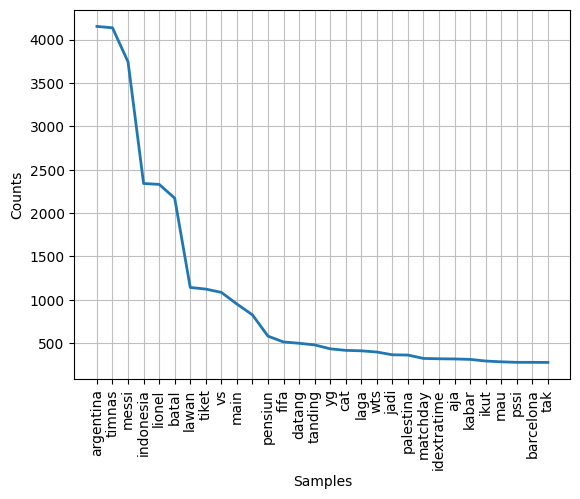

In [21]:
# plot kedalam grafik
freq_dist.plot(30, cumulative=False)
plt.show()

In [22]:
df.to_csv('data_clean_tweets.csv', index=False)

### **Analisis Sentimen**

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

tweet_df = df

In [25]:
tweet_df = tweet_df.drop('renderedContent', axis=1)
tweet_df = tweet_df.drop('token', axis=1)
tweet_df = tweet_df.drop('stop', axis=1)
tweet_df = tweet_df.drop('stemmed', axis=1)

In [26]:
tweet_df.head()

,Unnamed: 0,clean_text
0,0,lionel messi dikabarkan batal perkuat argentin...
1,1,absennya lionel messi membuat akun fifa bereak...
2,2,absennya lionel messi membuat akun fifa bereak...
3,3,batal ikut timnas argentina ke indonesia lione...
4,4,ternyata orang ini yang bikin lionel messi bat...


In [27]:
# Menampilkan data duplikat
duplicates = tweet_df[tweet_df.duplicated('clean_text')]
print("Data Duplikat:")
print(duplicates)

Data Duplikat:
      Unnamed: 0                                         clean_text
92            92  lionel messi batal ke indonesia gaston edul di...
612          612  lionel messi batal datang fans timnas singapur...
614          614  lionel messi batal datang fans timnas singapur...
855          855  resmi messi batal pensiun lionel messi akhirny...
1048        1048  aksi kudeta militer memanas lionel messi dan a...
...          ...                                                ...
4664        4664  wtb tiket fifa match day argentina vs indonesi...
4806        4806  wts cat  zona a sisa jastip satu tiket\n\ninte...
4811        4811  wts tiket timnas indonesia vs argentina\ncat  ...
4840        4840  wts tiket timnas indonesia vs argentina\ncat  ...
4998        4998  wts tiket timnas indonesia vs argentina\ncat  ...

[147 rows x 2 columns]


In [28]:
# Menghapus data duplikat
tweet_df = tweet_df.drop_duplicates('clean_text')
print("\nDataFrame setelah menghapus duplikat:")
print(tweet_df)


DataFrame setelah menghapus duplikat:
      Unnamed: 0                                         clean_text
0              0  lionel messi dikabarkan batal perkuat argentin...
1              1  absennya lionel messi membuat akun fifa bereak...
2              2  absennya lionel messi membuat akun fifa bereak...
3              3  batal ikut timnas argentina ke indonesia lione...
4              4  ternyata orang ini yang bikin lionel messi bat...
...          ...                                                ...
4994        4994  so²an pengen nonton timnas argentina paling pe...
4995        4995  bek timnas indonesia sandy walsh cedera absen ...
4996        4996           wts cat timnas argentina messifcb messi𓃵
4997        4997  menurut jurnalis kenamaan fabrizio roman lione...
4999        4999  jual murah wts tiket  timnas indonesia vs arge...

[4853 rows x 2 columns]


In [34]:
# Inisiasi pelabelan
sentiments = SentimentIntensityAnalyzer()
tweet_df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in tweet_df["clean_text"]]
tweet_df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in tweet_df["clean_text"]]
tweet_df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in tweet_df["clean_text"]]
tweet_df["Compound"] = [sentiments.polarity_scores(i)["compound"] for i in tweet_df["clean_text"]]

tweet_df.head()

,Unnamed: 0,clean_text,Positive,Negative,Neutral,Compound,Sentiment
0,0,lionel messi dikabarkan batal perkuat argentin...,0.0,0.0,1.0,0.0,negatif
1,1,absennya lionel messi membuat akun fifa bereak...,0.0,0.0,1.0,0.0,negatif
2,2,absennya lionel messi membuat akun fifa bereak...,0.0,0.0,1.0,0.0,negatif
3,3,batal ikut timnas argentina ke indonesia lione...,0.0,0.0,1.0,0.0,negatif
4,4,ternyata orang ini yang bikin lionel messi bat...,0.0,0.0,1.0,0.0,negatif


In [35]:
score = tweet_df['Compound'].values
sentiment = []

for i in score:
  if i >= 0.05:
    sentiment.append('positif')
  elif i <= -0.05:
    sentiment.append('negatif')
  else:
    sentiment.append('netral')

tweet_df['Sentiment'] = sentiment
tweet_df.head()

,Unnamed: 0,clean_text,Positive,Negative,Neutral,Compound,Sentiment
0,0,lionel messi dikabarkan batal perkuat argentin...,0.0,0.0,1.0,0.0,netral
1,1,absennya lionel messi membuat akun fifa bereak...,0.0,0.0,1.0,0.0,netral
2,2,absennya lionel messi membuat akun fifa bereak...,0.0,0.0,1.0,0.0,netral
3,3,batal ikut timnas argentina ke indonesia lione...,0.0,0.0,1.0,0.0,netral
4,4,ternyata orang ini yang bikin lionel messi bat...,0.0,0.0,1.0,0.0,netral


<ipython-input-36-48006755b71c>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


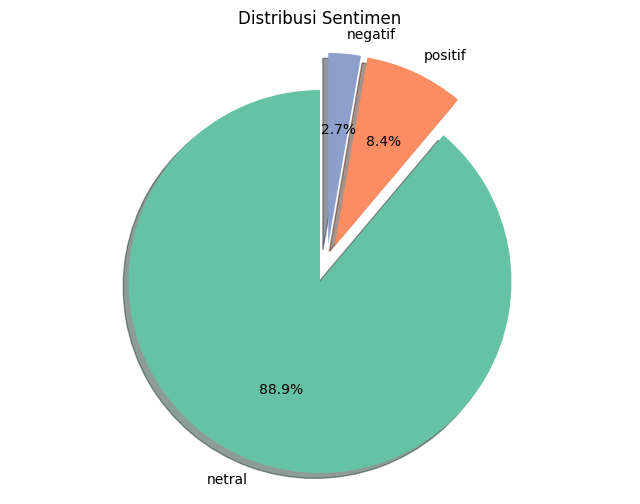

In [36]:
# visualisasikan distribusi sentimen untuk pemahaman
# Menghitung jumlah sentimen
sentiment_counts = tweet_df['Sentiment'].value_counts()

# Mengatur gaya visualisasi
plt.style.use('seaborn-pastel')

# Membuat visualisasi pie chart
plt.figure(figsize=(8, 6))
colors = ['#66c2a5', '#fc8d62', '#8da0cb']
explode = (0.1, 0.1, 0.1)
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=colors, autopct='%1.1f%%',
        startangle=90, explode=explode, shadow=True)
plt.title('Distribusi Sentimen')
plt.axis('equal')
plt.show()

### **Kesimpulan**

Dari keseluruhan proses yang telah dilakukan didapatkan bahwa kata-kata yang sering muncul mewakili topik ini, seperti kata-kata: messi, argentina, timnas, dan indonesia.

Berdasarkan hasil analisis sentimen, dapat disimpulkan bahwa pengguna Twitter cenderung netral terhadap topik pertandingan sepakbola antara tim nasional Indonesia melawan Argentina dan pembatalan kehadiran Lionel Messi. Dalam distribusi sentimen, sebanyak 88.9% dari pendapat yang dianalisis menunjukkan sikap netral. Hal ini menandakan bahwa mayoritas pengguna Twitter tidak secara tegas mengungkapkan sentimen positif atau negatif terkait dengan pembatalan kehadiran Messi. Analisis ini memberikan gambaran bahwa masyarakat memiliki pendekatan yang seimbang dalam menyikapi situasi ini, mungkin disebabkan oleh faktor-faktor seperti ketidakpastian atau penyesuaian ekspektasi terhadap perubahan dalam pertandingan tersebut.